# Story 7
Andrew Bowen     
DATA 608
CUNY Data Science Master's

## Data Sources

- [IEA Critical Minerals Demand Dataset](https://www.iea.org/data-and-statistics/data-product/critical-minerals-demand-dataset)
- [Global Geochemical Database for Critical Minerals](https://www.sciencebase.gov/catalog/file/get/5e616381e4b01d509255c7b6?f=__disk__9f%2Fe3%2F8b%2F9fe38b3bec1b9bc404b14578a226c080fcecf834&allowOpen=true) (USGS)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import StringIO

In [2]:
demand = pd.read_excel("~/Downloads/CM_Data_explorer.xlsx", sheet_name="3.2 Cleantech demand by mineral")
demand.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,Mineral demand for clean energy technologies -...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,Stated policies scenario,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Net Zero Emissions by 2050 scenario,NaN,NaN,NaN,NaN,NaN
3,NaN,2022.0,NaN,2025,2030.0,2035.0,2040.0,2045.0,2050.0,NaN,...,2040.0,2045.0,2050.0,NaN,2025,2030.0,2035.0,2040.0,2045.0,2050.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
url = "https://www.sciencebase.gov/catalog/file/get/5e616381e4b01d509255c7b6?f=__disk__9f%2Fe3%2F8b%2F9fe38b3bec1b9bc404b14578a226c080fcecf834&allowOpen=true"

r = requests.get(url)
data = r.text

In [4]:
df = pd.read_csv(StringIO(data))

df.head()

,LAB_ID,PREVIOUS_LAB_ID1,PREVIOUS_LAB_ID2,PREVIOUS_LAB_ID3,FIELD_ID,JOB_ID,PREVIOUS_JOB_ID1,PREVIOUS_JOB_ID2,PREVIOUS_JOB_ID3,SUBMITTER,...,Th_ppm_MS_ST,Tl_ppm_MS_ST,Tm_ppm_MS_ST,U_ppm_MS_ST,V_ppm_AES_ST,W_ppm_MS_ST,Y_ppm_MS_ST,Yb_ppm_MS_ST,Zn_ppm_AES_ST,Zr_ppm_AES_ST
0,C355417,NaN,NaN,NaN,RM0001,MRP11968,NaN,NaN,NaN,Rare Metals Task,...,0.2,-0.5,-0.05,0.30,51.0,-1.0,-0.5,-0.1,1290.0,3.8
1,C360759,NaN,NaN,NaN,RM0027,MRP12307,NaN,NaN,NaN,Rare Metals Task,...,9.7,0.5,-0.05,1.75,24.0,28.0,2.3,0.3,-5.0,133.0
2,C360762,NaN,NaN,NaN,RM0030,MRP12307,NaN,NaN,NaN,Rare Metals Task,...,2.6,-0.5,0.08,0.63,-5.0,22.0,5.9,0.6,161.0,16.2
3,C360763,NaN,NaN,NaN,RM0031,MRP12307,NaN,NaN,NaN,Rare Metals Task,...,0.2,-0.5,-0.05,34.80,493.0,11.0,1.9,0.2,29.0,19.1
4,C360769,NaN,NaN,NaN,RM0037,MRP12307,NaN,NaN,NaN,Rare Metals Task,...,2.6,-0.5,0.22,31.20,68.0,8.0,13.0,1.4,4480.0,150.0


In [5]:
df.to_csv("data/mineral-samples.csv", index=False)

In [6]:
df.COUNTRY.unique()

array(['United States', 'Chile', 'South Africa', 'Finland', 'Mexico',
       'Indonesia', 'Norway', 'Canada', 'Russia', 'Japan', 'Philippines',
       'Peru', 'Cuba', 'Australia', 'Burma', 'Portugal', 'Sweden',
       'China', 'Mauritania', 'Brazil', 'Argentina', 'Germany', 'Namibia',
       'Zambia', nan, 'India', 'Poland', 'Democratic Republic of Congo',
       'Vietnam', 'Papua New Guinea', 'Honduras'], dtype=object)

In [67]:
# Mapping countries to whet

alliance_mapping= {
    'Chile': "Neutral",
    'South Africa': "Ally",
    'Finland': "Ally", 
    'Mexico': "Neutral",
    'Indonesia': "Ally", 
    'Norway': "Ally", 
    'Canada': "Ally",
    'Russia': "Strained Relations", 
    'Japan': "Ally", 
    'Philippines': "Neutral",
    'Peru': "Neutral", 
    'Cuba': "Strained Relations",
    'Australia': "Ally", 
    'Burma': "Neutral", 
    'Portugal': "Ally", 
    'Sweden': "Ally",
    'China': "Strained Relations",
    'Mauritania': "Neutral",
    'Brazil': "Neutral",
    'Argentina': "Neutral", 
    'Germany': "Ally",
    'Namibia': "Neutral",
    'Zambia': "Neutral",
    'India': "Neutral",
    'Poland': "Ally",
    'Democratic Republic of Congo': "Neutral",
    'Vietnam': "Neutral",
    'Papua New Guinea': "Neutral",
    'Honduras': "Neutral"
}

color_mapping = {
    "Ally": "b",
    "Strained Relations": "r",
    "Neutral": "g"
}




In [68]:
dat = df.loc[df.COUNTRY != "United States"]



dat = df.groupby("COUNTRY").count()\
    .reset_index()\
    .sort_values("LAB_ID", ascending=False)

dat['relations'] = dat['COUNTRY'].map(alliance_mapping)
dat['relations_color'] = dat['relations'].map(color_mapping)


Text(0.5, 0.98, 'Number of Mineral Samples produced internationally')

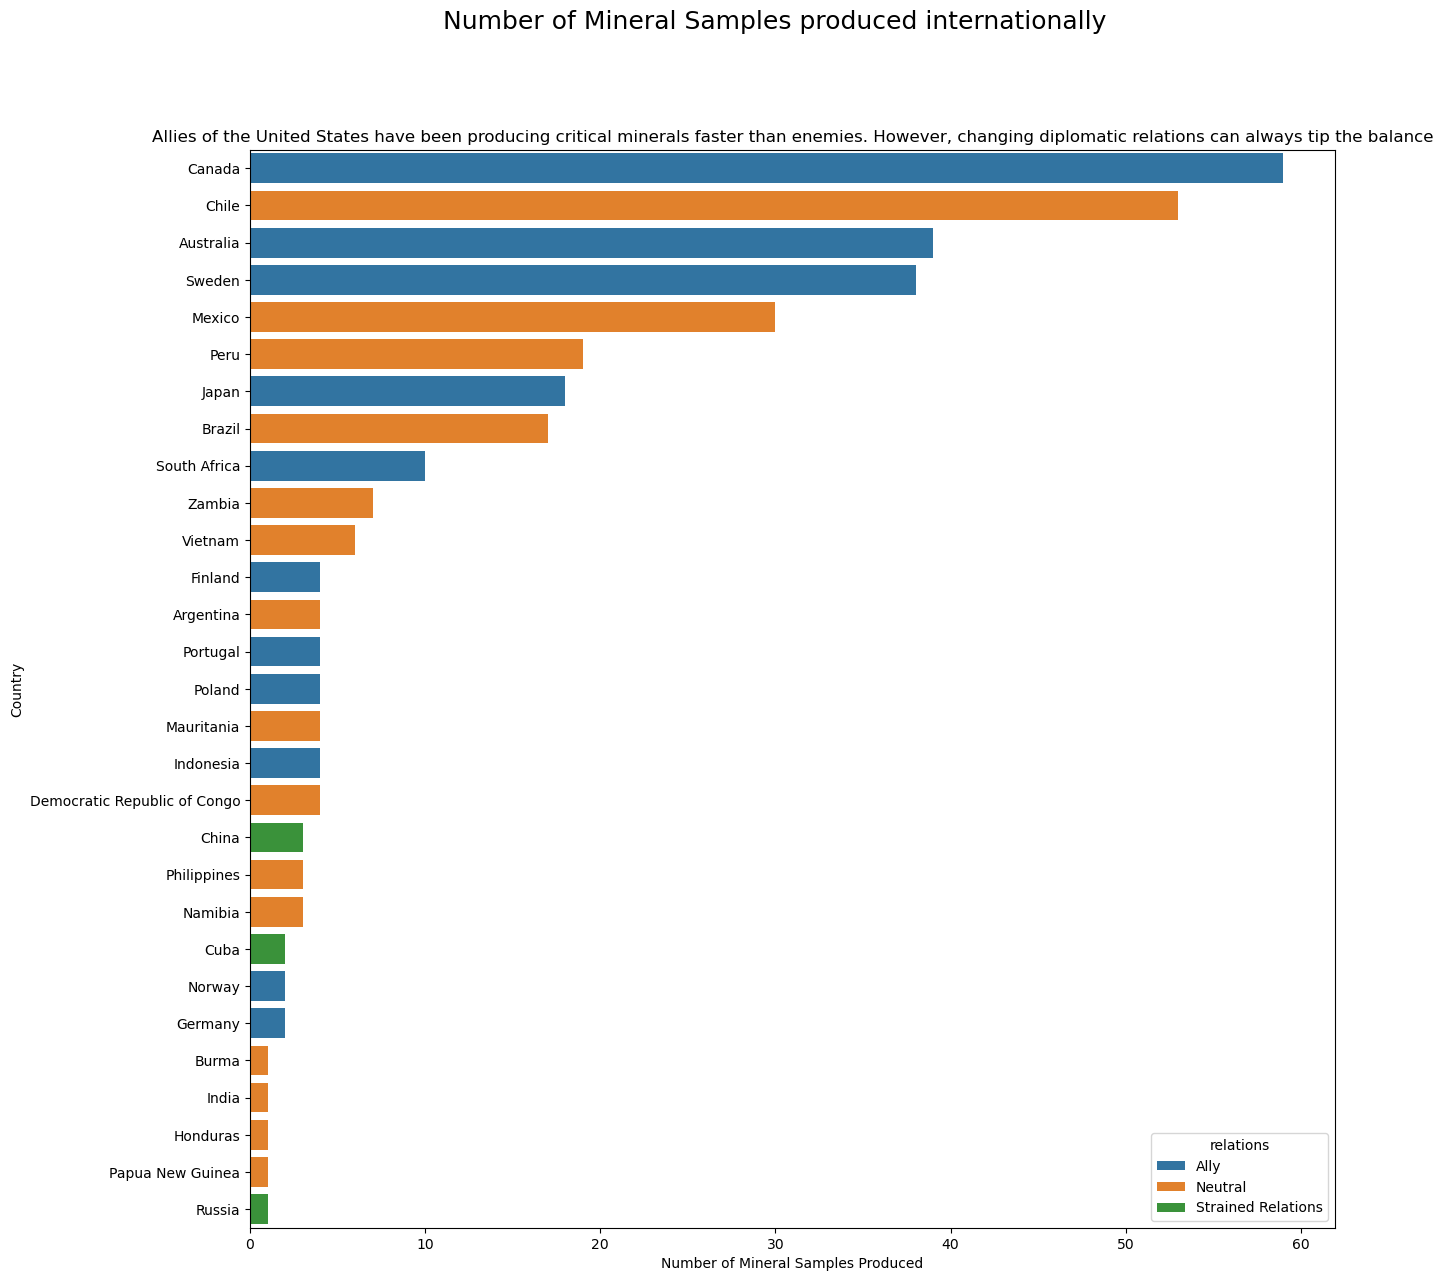

In [78]:
# Plot number of mineral samples per country
f, ax = plt.subplots(figsize=(14, 14))
sns.barplot(x="LAB_ID", y="COUNTRY", data=dat, hue='relations', dodge=False)
plt.xlabel("Number of Mineral Samples Produced")
plt.ylabel("Country")
plt.title("Allies of the United States have been producing critical minerals faster than enemies. However, changing diplomatic relations can always tip the balance")
plt.suptitle("Number of Mineral Samples produced internationally", fontsize=18)

<Axes: xlabel='Number of mineral samples', ylabel='Country'>